In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [2]:
train=pd.read_csv("C:/Users/karthika/Downloads/train-1 (2).csv")
test=pd.read_csv("C:/Users/karthika/Downloads/test (4).csv")

In [3]:
train.shape

(7352, 563)

In [4]:
test.shape

(2947, 563)

In [5]:
Data=pd.concat([train,test], ignore_index=True)

In [6]:
y = Data.Activity
x = Data.drop(['subject','Activity'], axis = 1)

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 44.1 MB


In [8]:
x.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroMean,gravityMean)        0
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Length: 561, dtype: int64

In [9]:
x.shape

(10299, 561)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

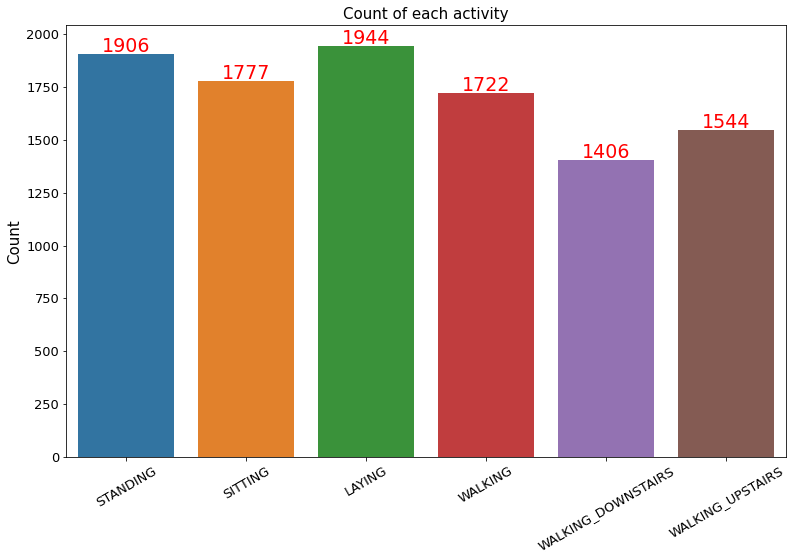

In [11]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_axes([0,0,1,1])
ax.set_title("Count of each activity", fontsize=15)
plt.tick_params(labelsize=10)
sns.countplot(x="Activity", data=Data)
for i in ax.patches:
    ax.text(x=i.get_x()+0.2, y= i.get_height()+10,s=str(i.get_height()),fontsize=19,color="red")
plt.xlabel("")
plt.ylabel("Count", fontsize=15)
plt.tick_params(labelsize=13)
plt.xticks(rotation=30)
plt.show()

In [12]:
temp = Data["Activity"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

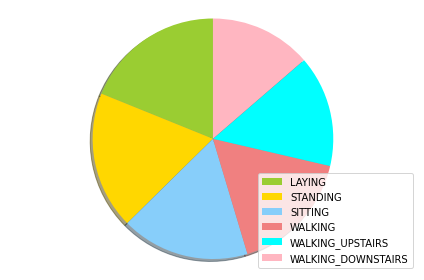

In [13]:
labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [14]:
cols = Data.columns
cols = cols.str.replace('[()]','')
cols = cols.str.replace('[-]','')
cols = cols.str.replace('[,]','')

C:\Users\karthika\AppData\Local\Temp/ipykernel_11976/730519068.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = cols.str.replace('[()]','')
C:\Users\karthika\AppData\Local\Temp/ipykernel_11976/730519068.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = cols.str.replace('[-]','')
C:\Users\karthika\AppData\Local\Temp/ipykernel_11976/730519068.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = cols.str.replace('[,]','')


In [15]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(x)

In [16]:
x=pd.DataFrame(scaled_data)

In [17]:
print(x)

            0         1         2         3         4         5         6    \
0      0.644292  0.489853  0.433547  0.002361  0.008445  0.043237  0.002444   
1      0.639209  0.491795  0.438240  0.000877  0.012350  0.019839  0.000596   
2      0.639827  0.490266  0.443269  0.002310  0.016406  0.010528  0.001740   
3      0.639587  0.486900  0.438359  0.001954  0.008299  0.004662  0.001450   
4      0.638314  0.491715  0.442319  0.000931  0.009591  0.004759  0.000839   
...         ...       ...       ...       ...       ...       ...       ...   
10294  0.655077  0.473304  0.450446  0.356067  0.429705  0.392456  0.321958   
10295  0.681692  0.480393  0.447042  0.347306  0.514074  0.401814  0.313230   
10296  0.674983  0.515039  0.442106  0.335181  0.478929  0.374910  0.305992   
10297  0.618797  0.509233  0.451751  0.338443  0.385112  0.396213  0.303810   
10298  0.576814  0.490782  0.431491  0.334977  0.402373  0.417831  0.284513   

            7         8         9    ...       551 

In [18]:
Dataset=pd.concat([x,y], axis=1)

In [19]:
Dataset.shape

(10299, 562)

In [20]:
traind=Dataset.iloc[:7352]
testd=Dataset.iloc[7352:]

In [21]:
testd.to_csv("Desktop/testd.csv")

In [22]:
traind.shape

(7352, 562)

In [23]:
testd.shape

(2947, 562)

In [24]:
Y=traind.Activity
X=traind.drop(['Activity'], axis = 1)

In [25]:
y=testd.Activity
x=testd.drop(['Activity'], axis = 1)

In [26]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,train_size = 0.8, test_size = 0.2,random_state =50)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [28]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(x_train,y_train)
print("Train Score =",model.score(x_train,y_train))
print("Test Score =",model.score(x_test,y_test))

Train Score = 0.9880972623703452
Test Score = 0.972807613868117


C:\Users\karthika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierKNN.fit(x_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred = classifierKNN.predict(x_test)

In [31]:
print(y_pred)

['STANDING' 'WALKING_DOWNSTAIRS' 'STANDING' ... 'WALKING_DOWNSTAIRS'
 'STANDING' 'STANDING']


In [32]:
from sklearn import svm
clf=svm.SVC(kernel='linear') 
clf.fit(x_train,y_train)
y_pre=clf.predict(x_test)
clf.score(x_test,y_test)

0.9830047586675731

In [33]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)
y_predicted = naive_bayes.predict(x_test)

In [34]:
from sklearn import metrics
metrics.accuracy_score(y_predicted,y_test)

0.6845683208701564

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [36]:
model1=DecisionTreeClassifier().fit(x_train,y_train)
print("Train Score=",model.score(x_train,y_train))
print("Test Score=",model.score(x_test,y_test))
y_predicted=model.predict(x_test)

Train Score= 0.9880972623703452
Test Score= 0.972807613868117


In [37]:
yy=[0.62858889,0.488357385,0.492673119,0.030798,0.03995461,0.166158345,0.02374944,0.037375665,0.16284889,0.052956225,0.222711395,0.266888525,0.858604235,0.8177512,0.89474833,0.061117885,0.00111697,0.000793095,0.032827375,0.012165515,0.025088175,0.0847611,0.41595792,0.310502235	0.62310849	0.76060182	0.256103445	0.741140235	0.477268944	0.605977525	0.432552785	0.56542924	0.492911844	0.447014575	0.536772007	0.41424179	0.520031489	0.538494467	0.254727135	0.145498675	0.968244625	0.35864042	0.557644125	0.037286365	0.031492935	0.21785579	0.03499004	0.031089025	0.19720615	0.953041295	0.360377935	0.576447595	0.9722307	0.36892022	0.461919162	0.49108654	0.91464841	0.0676897	0.016102345	0.02513667	0.0269404	0.120140925	0.287512325	0	0.609613655	0.284873215	0.71552414	0.28408054	0.7163869	0.10226614	0.890656945	0.109804265	0.89263579	0.00779488	0.99358993	0.005292615	0.993843065	0.99029014	0.001824115	0.01994147	0.536023004	0.522877201	0.44697867	0.04665862	0.030991805	0.032032085	0.041959535	0.03163727	0.025473105	0.048387925	0.025090835	0.054298265	0.949239675	0.97509082	0.973076395	0.03466356	0.002477035	0.001252245	0.0014922	0.031792	0.026562935	0.015612695	0.457412925	0.34486848	0.24485621	0.760740865	0.38705517	0.745864215	0.656377775	0.6148984	0.556979625	0.609939305	0.71148727	0.458683412	0.570213265	0.40188386	0.53617897	0.367569885	0.517926075	0.325132375	0.55998808	0.454103832	0.59481427	0.058455445	0.0919182	0.029559385	0.055693845	0.07109949	0.027090865	0.168294715	0.143281685	0.175660695	0.918550195	0.912628385	0.90548857	0.10175003	0.01019182	0.00854997	0.00298158	0.05672106	0.04694787	0.02097562	0.887016395	0.36614706	0.72612403	0.460774367	0.493710692	0.61799078	0.400476245	0.51695892	0.459609734	0.503499358	0.622442755	0.608258305	0.360159615	0.624869375	0.508859876	0.82423227	0.381534455	0.349132655	0.397551895	0.412756145	0.45330533	0.049387925	0.044569975	0.03037479	0.044818645	0.036321625	0.023222935	0.066042845	0.04325111	0.051211045	0.952468345	0.958654195	0.9738061	0.035195475	0.00265689	0.002104715	0.001093675	0.031729595	0.020560215	0.014825845	0.51830956	0.538229967	0.401436975	0.55325713	0.489594053	0.59662892	0.652239375	0.557864615	0.5270748	0.534475619	0.5985248	0.65496413	0.393671445	0.58658907	0.57292227	0.562004375	0.42232683	0.338281365	0.06653531	0.14740444	0.12798914	0.11960218	0.00917565	0.06653531	0.00991711	0.070262885	0.62755218	0.526889848	0.397927755	0.805263775	0.21777534	0.06653531	0.14740444	0.12798914	0.11960218	0.00917565	0.06653531	0.00991711	0.070262885	0.62755218	0.526889848	0.397927755	0.805263775	0.21777534	0.035116725	0.052002875	0.049791345	0.048497805	0.012494455	0.035116725	0.00219614	0.04293967	0.435223845	0.619455465	0.327201425	0.66323118	0.368476	0.102228035	0.11896339	0.10866384	0.141703175	0.117903695	0.102228035	0.01292394	0.080209495	0.833781345	0.517810569	0.41905301	0.57662503	0.496620198	0.037402555	0.052828195	0.04992666	0.04163146	0.011816675	0.037402555	0.00208789	0.04408125	0.665827155	0.75847658	0.243248	0.520659903	0.505917506	0.040745155	0.040893405	0.105454275	0.025854825	0.037431565	0.18184163	0.034659855	0.03778076	0.137548725	0.015787965	0.029931625	0.201405635	0.016931435	0.00777473	0.023956465	0.06746841	0.001078145	0.001981875	0.029902485	0.047579785	0.033093775	0.065308545	0.330163365	0.25709838	0.416871175	0	0	0	0.505558474	0.560625345	0.238525655	0.21400025	0.05269382	0.33086704	0.156601275	0.59477625	0.443202145	0.000746865	0.00102869	0.00220106	0.002482205	0.00201155	0.004256285	0.00393442	0.00011244	0.000898025	0.002626635	0.002845485	0.002653385	0.00098977	0.003136265	0.001895525	0.001011925	0.000539545	0.00179947	0.00122004	0.002465985	0.00132437	0.000880975	0.001964735	0.001037705	0.00182168	0.0011801	0.00188998	0.001887305	0.03764725	0.00295136	0.002338265	0.00051528	0.00104919	0.00253519	0.00536964	0.0099573	0.031031655	0.001661215	0.0014873	0.00678631	0.030399605	0.00078408	0.05018342	0.0312575	0.0382243	0.037785435	0.02839481	0.02605424	0.051692725	0.030845445	0.02871215	0.02568287	0.02083729	0.02059157	0.028058795	0.006348335	0.010767205	0.047362875	0.002481955	0.001250345	0.00148465	0.05646132	0.03209022	0.023173365	0.2646692	0.1639141	0.20186298	0.24	0.54	0.66	0.725502695	0.568583515	0.409850435	0.20995693	0.045964985	0.18723657	0.02862142	0.16904497	0.044233945	0.00049426	0.00118497	0.002007615	0.00264577	0.00221421	0.006061745	0.006777385	0.000897415	0.000979795	0.00275159	0.00397519	0.006833485	0.001553235	0.004618655	0.00029542	0.00067597	0.000625625	0.001796865	0.00141389	0.0027349	0.001040105	1.52E-05	0.000679165	0.00129915	0.002294575	0.0009088	0.00076847	0.002002095	0.003180575	0.0010811	0.001435345	0.00062525	0.00164562	0.00244517	0.000757095	0.00045323	0.002037685	0.00102453	0.00199355	0.00076996	0.001866475	0.00114977	0.08822106	0.09604201	0.04104372	0.04836863	0.0886615	0.02191746	0.06743648	0.08409959	0.029471915	0.047600995	0.060371685	0.016105755	0.06070033	0.025835425	0.040157415	0.085763985	0.003525235	0.008668445	0.001003365	0.0605528	0.080924015	0.035430025	0.500379074	0.60007184	0.37330792	0	0.032258065	0.03448276	0.592017285	0.470338572	0.71905358	0.30228862	0.1506192	0.30627138	0.106802915	0.257173205	0.10659244	0.00268546	0.00476543	0.00361109	0.002160155	0.00646114	0.006674515	0.007942775	0.007374895	0.003223725	0.003784875	0.00719709	0.00769149	0.003365395	0.003637275	0.01103609	0.002573885	0.001090425	0.002578525	0.003795045	0.005938665	0.004783385	0.006019365	0.00910452	0.001800405	0.004273855	0.005970005	0.008975825	0.003310005	0.000561155	0.000816675	0.00076635	0.00081269	0.000547045	0.002053195	0.00343582	0.002263845	0.00080645	0.00112285	0.000952035	0.002926175	0.00090471	0.000854975	0.104526785	0.144463	0.136646505	0.111151425	0.02755933	0.104526785	0.02300822	0.063228695	0.41270356	0	0.25827373	0.505520341	0.30774169	0.05246941	0.05182021	0.0559013	0.03576717	0.050950095	0.05246941	0.003264285	0.039261655	0.257690355	0	0.482322104	0.37287585	0.149837135	0.114695	0.101443575	0.117757715	0.0899062	0.031020325	0.114695	0.01452099	0.10080674	0.589717615	0	0.476304351	0.266075495	0.119337115	0.054917275	0.04634622	0.052349715	0.04105852	0.04508562	0.054917275	0.002947285	0.050989245	0.382592355	0	0.535822723	0.33481478	0.14701306	0.503231201	0.58145991	0.08705719	0.635575725	0.139995365	0.63840052	0.471010848	STANDING
]

SyntaxError: invalid syntax (Temp/ipykernel_11976/475697457.py, line 1)

In [38]:
yy=pd.read_csv("Desktop/testd.csv")
y=yy.drop(['Activity','Unnamed: 0'], axis = 1)

In [51]:
ipt=y.head(1)

In [52]:
ipt

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.628589,0.488357,0.492673,0.030798,0.039955,0.166158,0.023749,0.037376,0.162849,0.052956,...,0.535823,0.334815,0.147013,0.503231,0.58146,0.087057,0.635576,0.139995,0.638401,0.471011


In [53]:
result=model.predict(ipt)

C:\Users\karthika\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [54]:
print(result)

['STANDING']
